In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, \
learning_curve, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.decomposition import PCA

from scipy.stats import mannwhitneyu

sns.set(font_scale=1.5)
pd.options.display.max_columns = 50

## Project plan
* 1. Feature and data explanation
* 2. Primary data analysis
* 3. Primary visual data analysis
* 4. Insights and found dependencies
* 5. Metrics selection
* 6. Model selection
* 7. Data preprocessing
* 8. Cross-validation and adjustment of model hyperparameters
* 9. Creation of new features and description of this process
* 10. Plotting training and validation curves
* 11. Prediction for test or hold-out samples
* 12. Conclusions

## 1. Feature and data explanation

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### 1.1 Process of collecting data



Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


The data used is available through https://www.kaggle.com/uciml/breast-cancer-wisconsin-data  
And can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29  
This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

### 1.2 Detailed explanation of the task

The task here is to predict whether the cancer is benign or malignant based in 30 real-valued features.

### 1.3 Target features

Attribute Information:

1) ID number  
2) Diagnosis (M = malignant, B = benign)  
3-32) 

Ten real-valued features are computed for each cell nucleus:  
a) radius (mean of distances from center to points on the perimeter)  
b) texture (standard deviation of gray-scale values)  
c) perimeter  
d) area  
e) smoothness (local variation in radius lengths)  
f) compactness (perimeter^2 / area - 1.0)  
g) concavity (severity of concave portions of the contour)  
h) concave points (number of concave portions of the contour)  
i) symmetry  
j) fractal dimension ("coastline approximation" - 1)  

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


All feature values are recoded with four significant digits.  
Missing attribute values: none  
Class distribution: 357 benign, 212 malignant  

## 2. Primary data analysis

### 2.0 Data preprocessing

In [4]:
target = pd.DataFrame(df['diagnosis'])
data = df.drop(['diagnosis'], axis=1)

### 2.1 Constant columns

General data overview:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non-null float64
concave points_se          569 no

Drop constant column ** Unnamed: 32 ** and **id** column which is useless for analize:

In [6]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

### 2.2 Missing values

Check data for missing values:

In [7]:
print("Are there missing values:", data.isnull().values.any())

Are there missing values: False


### 2.3 Summary statistics

General data statistics overview:

In [8]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**Conclusion:** here we can see vary different min/max values for features, for example *area_mean* and *smoothness_mean*. Thus we should check for outliers (box plot is good option for that).

### 2.4 Statistics for different classes

Check if difference of features mean values is statistically important. We will use Mann Whitney criteria, because of it unsesetive to outliers and different samples distribution.

In [9]:
for column in data.columns:
    m = data[column][target['diagnosis']=='M']
    b = data[column][target['diagnosis']=='B']
    statistic, pvalue = mannwhitneyu(m, b)
    
    print('Column:', column, 'Important:', pvalue < 0.05 )

Column: radius_mean Important: True
Column: texture_mean Important: True
Column: perimeter_mean Important: True
Column: area_mean Important: True
Column: smoothness_mean Important: True
Column: compactness_mean Important: True
Column: concavity_mean Important: True
Column: concave points_mean Important: True
Column: symmetry_mean Important: True
Column: fractal_dimension_mean Important: False
Column: radius_se Important: True
Column: texture_se Important: False
Column: perimeter_se Important: True
Column: area_se Important: True
Column: smoothness_se Important: False
Column: compactness_se Important: True
Column: concavity_se Important: True
Column: concave points_se Important: True
Column: symmetry_se Important: True
Column: fractal_dimension_se Important: True
Column: radius_worst Important: True
Column: texture_worst Important: True
Column: perimeter_worst Important: True
Column: area_worst Important: True
Column: smoothness_worst Important: True
Column: compactness_worst Important:

**Conclusion:** differences in almost all features are statistically important. So they will contribute more enough information to classification.

### 2.5 Target feature

Number of eamples for each class:

In [10]:
target['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Let's check the ratio of examples belong to each class:

In [11]:
target['diagnosis'].value_counts() / target['diagnosis'].size

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

**Conclusion:** there are a lot more examples for benign class, but not enough for skewed classes problem.

## 3. Primary visual data analysis 

For the sake of informative data visualization we need to standardize and scale features, because of some features have very different max/min values.

In [12]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
data_scaled = pd.DataFrame(scaled_data, columns=data.columns)
data_scaled['diagnosis'] = target['diagnosis']

### 3.1 Linear dependecies of the features (correlation matrix):

Helper function for plotting feature correlations:

In [13]:
def plot_corr(data):
    plt.figure(figsize=[40, 40])
    ax = sns.heatmap(data.corr(), annot=True, fmt= '.1f', linewidths=.5)
    ax.set_xticklabels(ax.get_xticklabels(), size='xx-large')
    ax.set_yticklabels(ax.get_yticklabels(), size='xx-large')
    plt.show();

Data correlations:

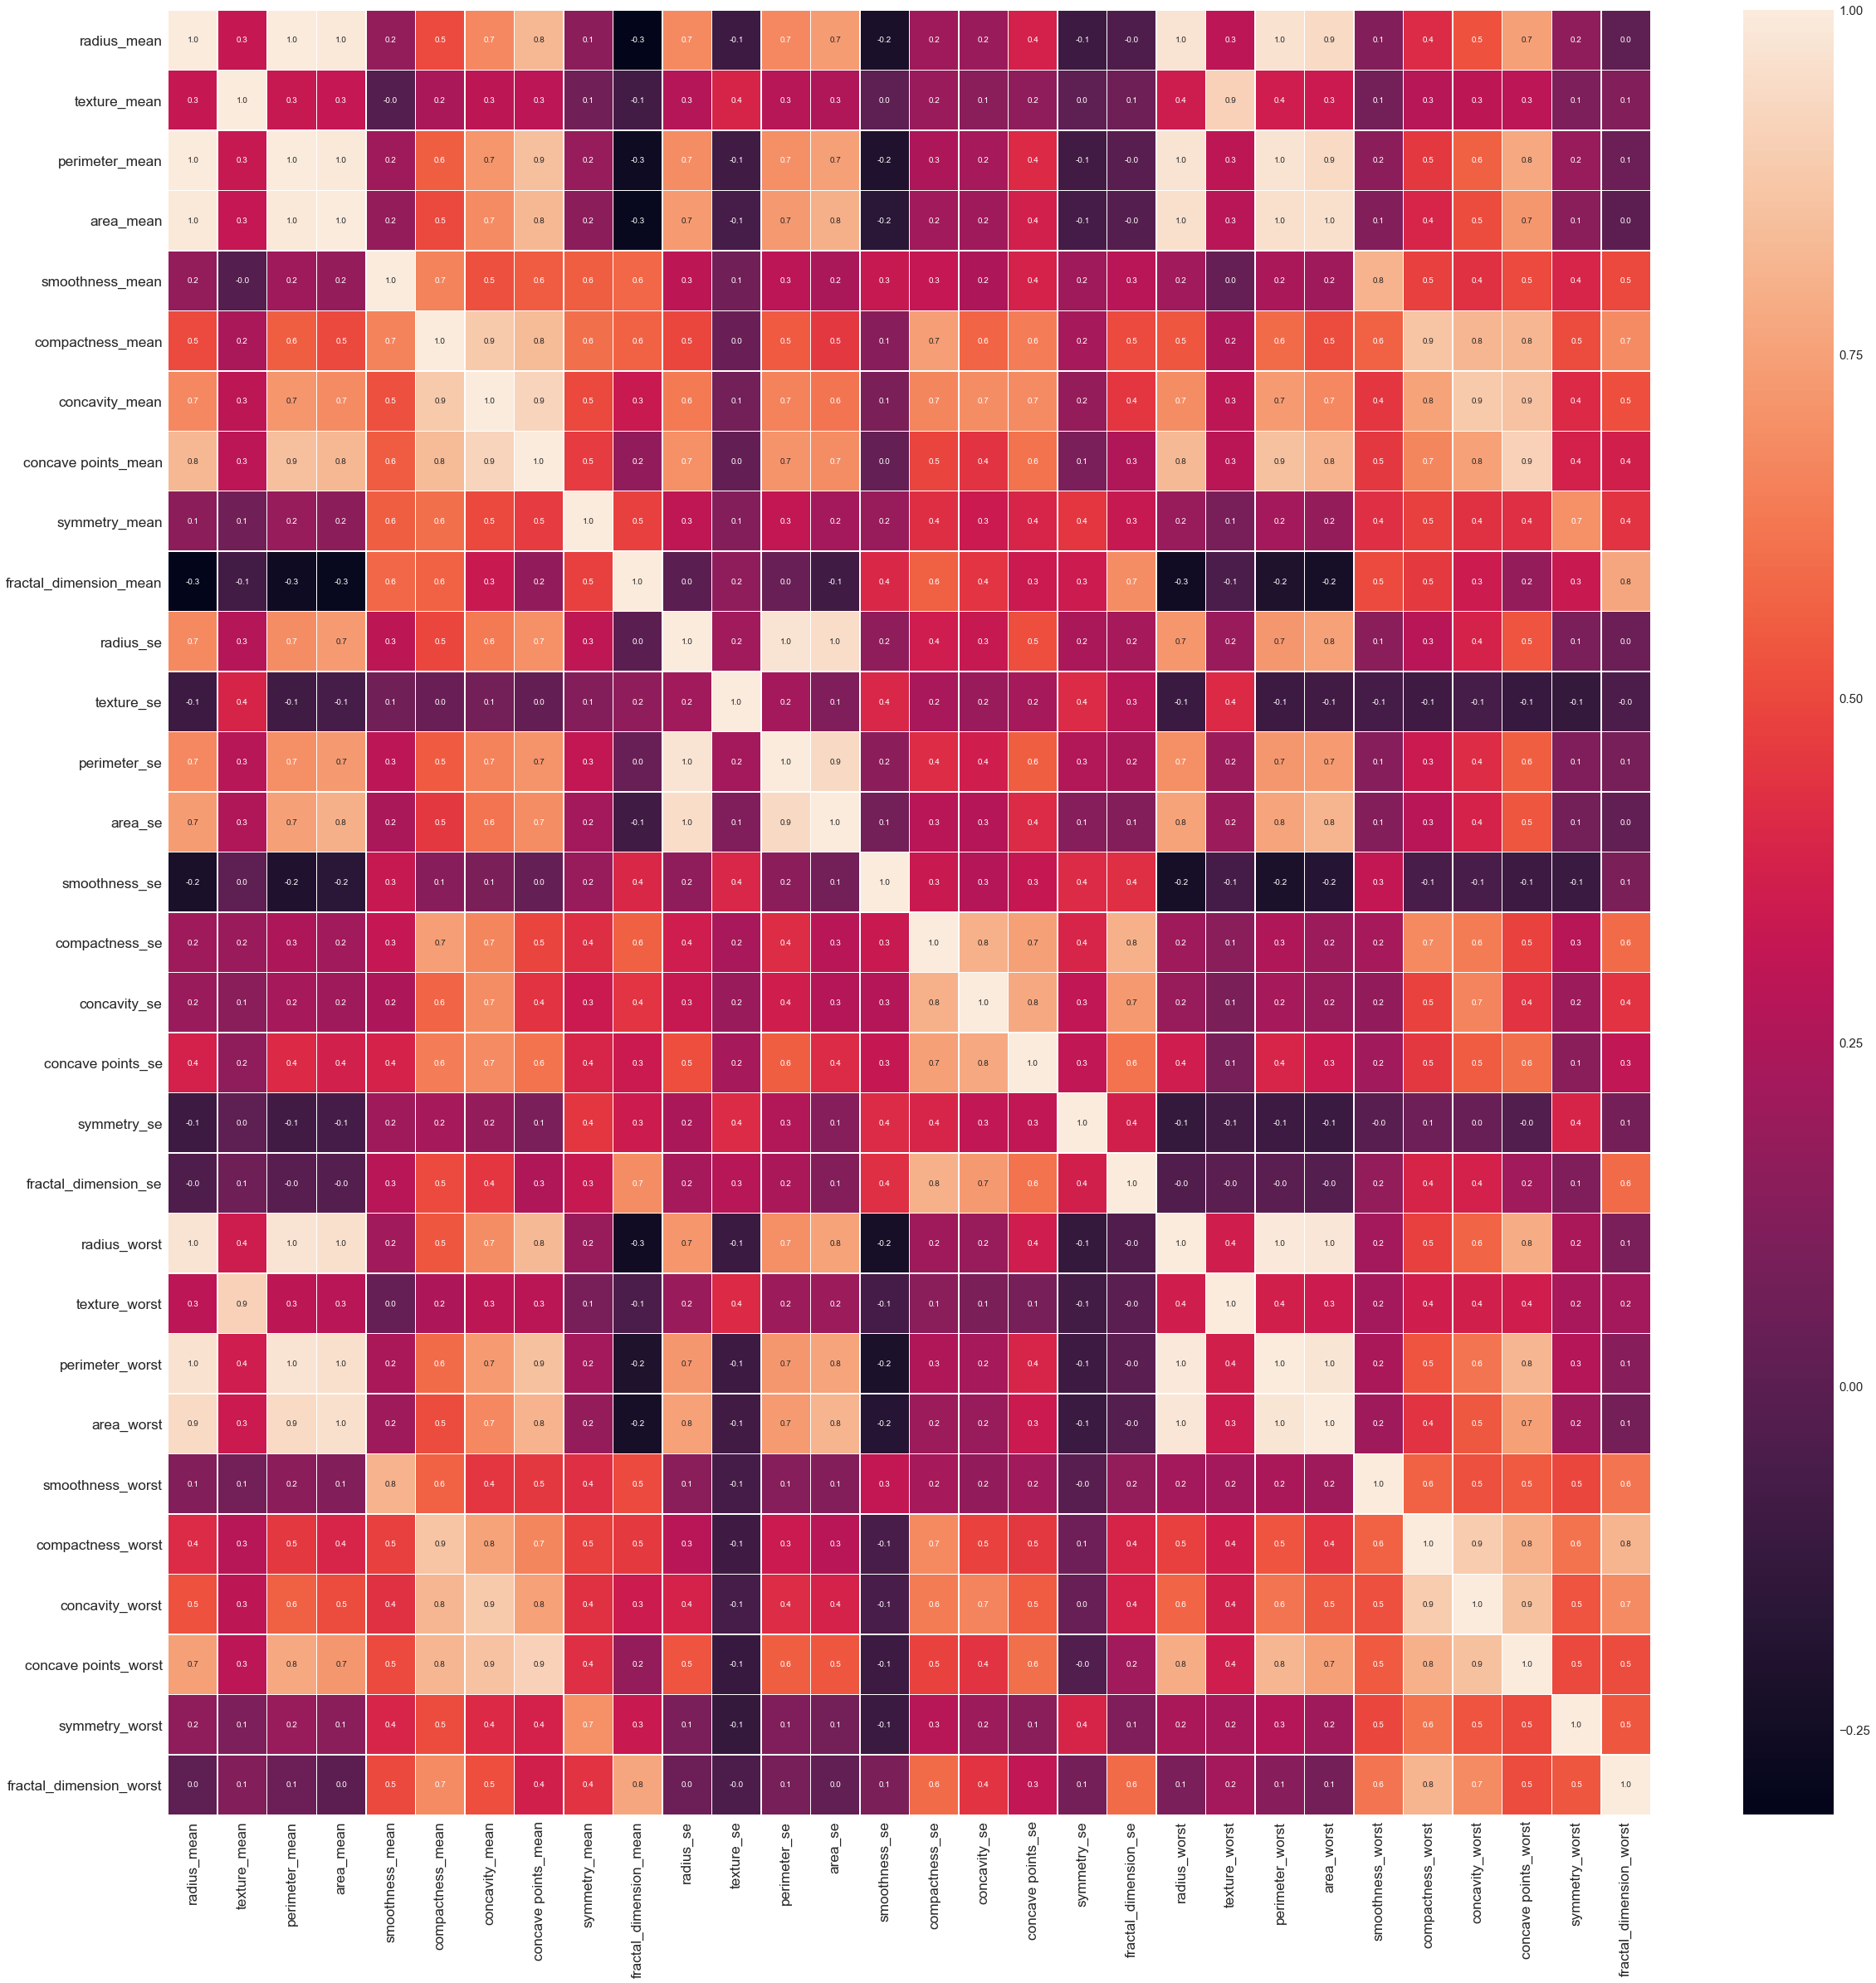

In [14]:
plot_corr(data)

**Conclusion:** there are several groups of correlated features:
- radius_mean, perimeter_mean, area_mean 
- compactness_mean, concavity_mean, concave points_mean
- radius_se, perimeter_se, area_se
- radius_worst, perimeter_worst and area_worst 
- compactness_worst, concavity_worst, concave points_worst
- compactness_se, concavity_se, concave points_se
- texture_mean, texture_worst
- area_worst, area_mean

### 3.2 Outliers

In [15]:
data_z = pd.melt(data_scaled, id_vars="diagnosis", var_name="features", value_name='value')

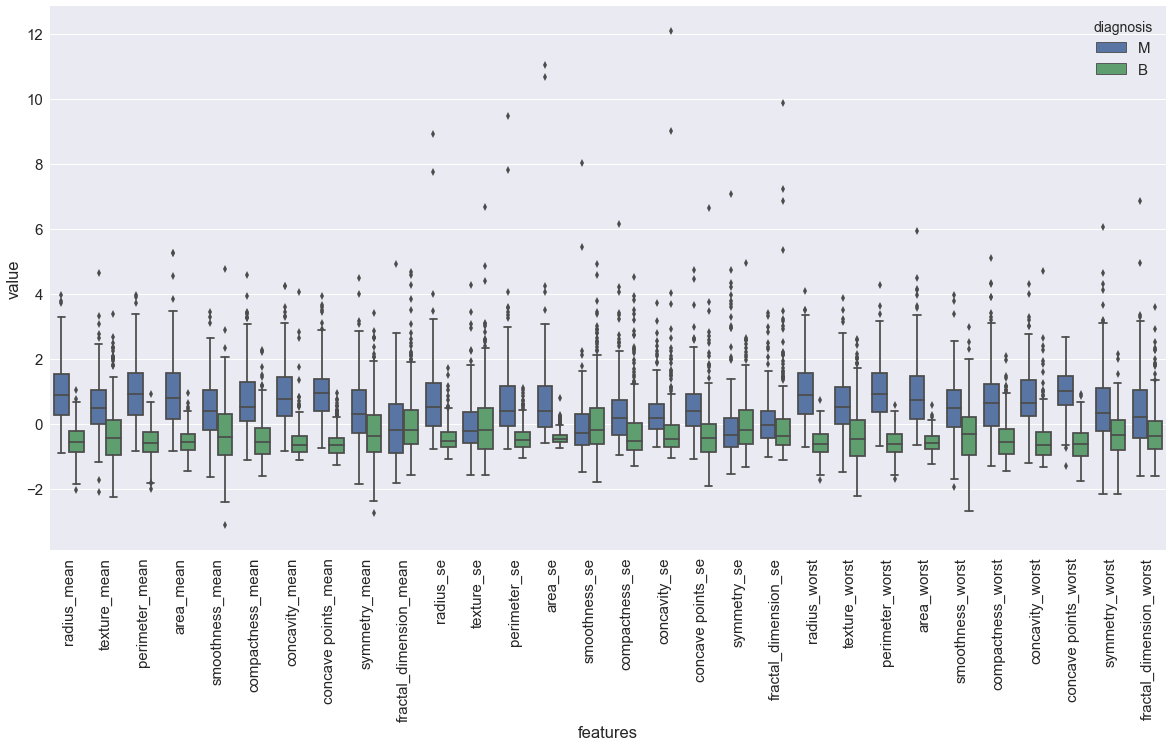

In [16]:
plt.figure(figsize=(20, 10));
ax = sns.boxplot(x='features', y='value', hue='diagnosis', data=data_z);
ax.set_xticklabels(ax.get_xticklabels());
plt.xticks(rotation=90);

**Conclusion:** there are a lot of variable with outliers. So before training we have to handle it. 

### 3.3 Distribution of classes

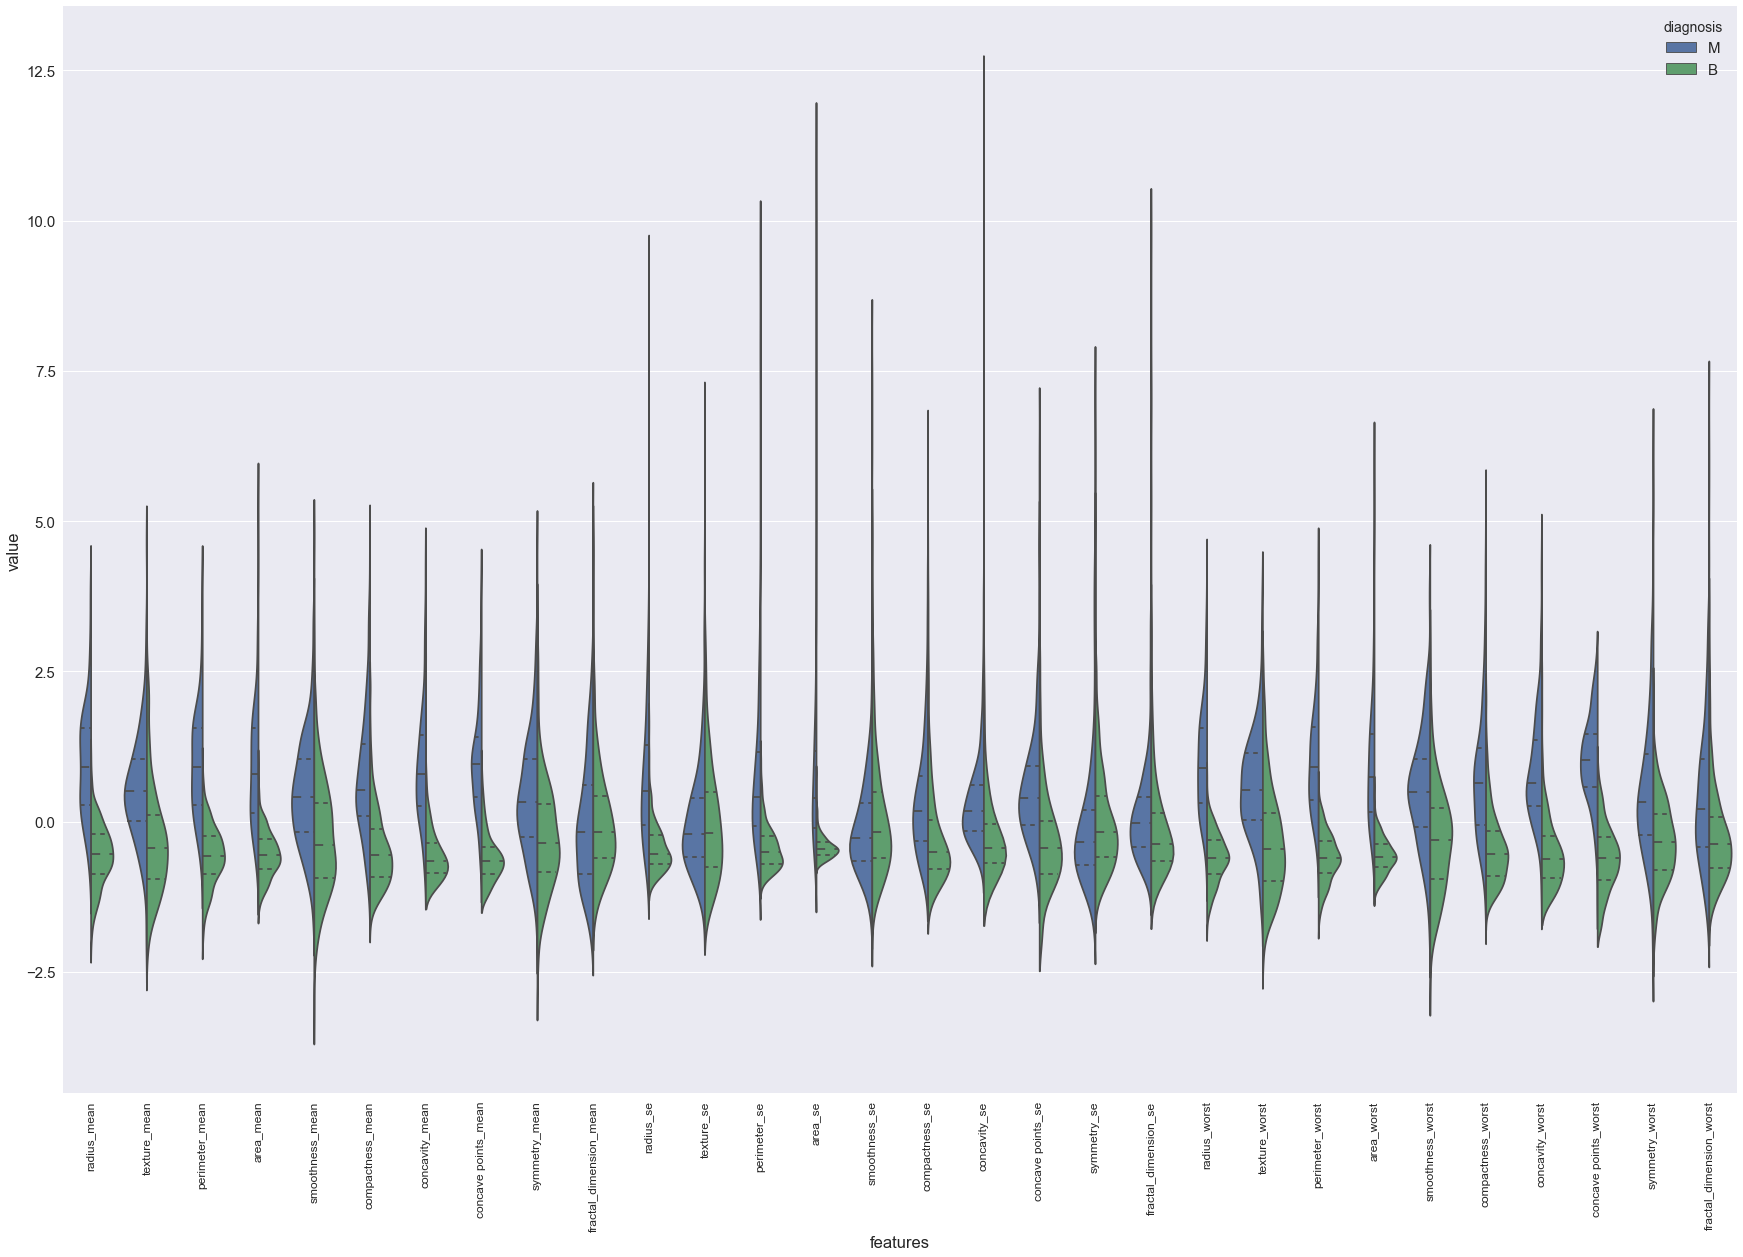

In [17]:
plt.figure(figsize=(30, 20));
ax = sns.violinplot(x="features", y="value", hue="diagnosis", data=data_z, split=True, inner="quartile");
ax.set_xticklabels(ax.get_xticklabels(), size='large');
plt.xticks(rotation=90);

**Conclusion:** in some features, like *radius_mean*, *texture_mean*, median of each class separated, so they can be useful for classification. Other features, like *smoothness_se*, are not so separated and my be less useful for classification. Most all the features have normal-like distribution with long tail.

### 3.4 Dimensionality reduction

Apply pca for dimensionality reduction:

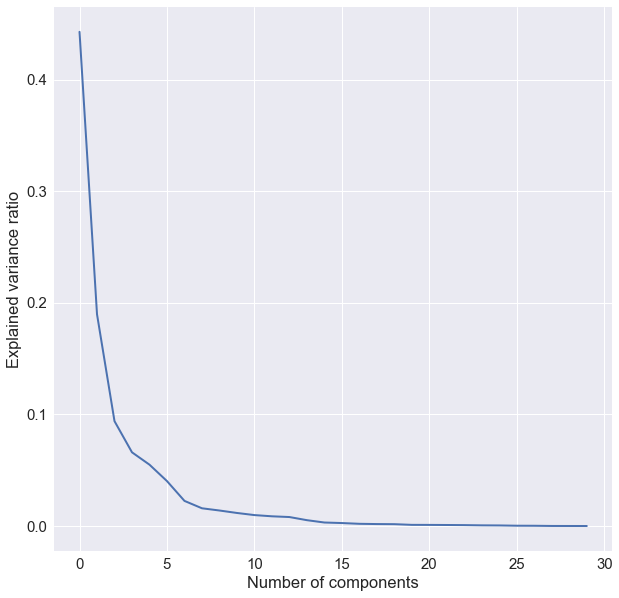

In [18]:
pca = PCA(random_state=24)
pca.fit(scaled_data)

plt.figure(figsize=(10, 10))
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.xlabel('Number of components');
plt.ylabel('Explained variance ratio');

**Conclusion:** according to elbow method 3 components may be choosen.

Check the number of components for explaining data variance:

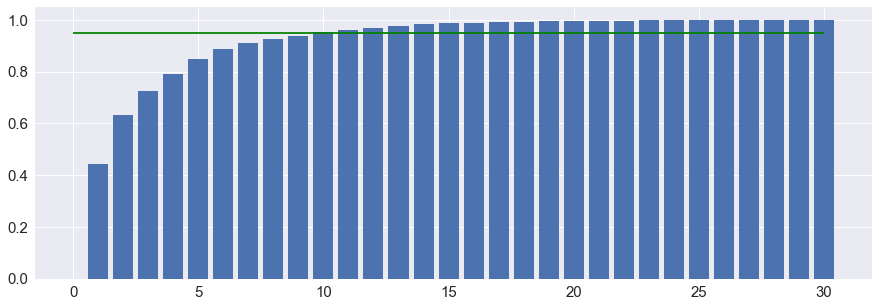

In [19]:
components = range(1, pca.n_components_ + 1)
plt.figure(figsize=(15, 5));
plt.bar(components, np.cumsum(pca.explained_variance_ratio_));
plt.hlines(y = .95, xmin=0, xmax=len(components), colors='green');

**Conclusion:** The two first components explains the 0.6324 of the variance. We need 10 principal components to explain more than 0.95 of the variance and 17 to explain more than 0.99. 

Reduce dimensions of data and plot it:

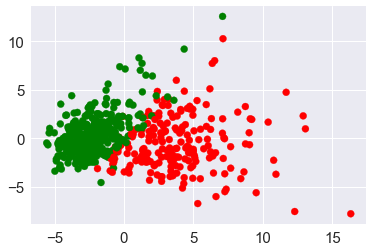

In [20]:
pca_two_comp = PCA(n_components=2, random_state=24)
two_comp_data = pca_two_comp.fit_transform(scaled_data)
plt.scatter(x=two_comp_data[:, 0], y=two_comp_data[:, 1], 
            c=target['diagnosis'].map({'M': 'red', 'B': 'green'}))
plt.show()

**Conclusion:** data is good enough separable using only two components.

## 4. Insights and found dependencies

Data summary:
- there are a lot of groups with correlated features. Next we have to get rid from multi-collinearity by selectig one feature for each group.
- ration of examples in each class 0.67/0.27. No skewed classes here, which is important for metric selection;
- differences in features stitistics (mean) for each class are statisticalli important. So this features will be important for classification.
- there are outliers in data. It's important to get rid of them for outliers-sensetive models (logistic regression  for example) before training;
- PCA shows thad data is good enough separable using only 3-5 features.

## 5. Metrics selection

Predict whether the cancer is benign or malignant is a **binary classification** task. Here we don't face the probem of skewed classes. So **accuracy** metric will be a good choice for model evaluation. Also this metric is simple enough, thus highly interpretable.

$$Accuracy=\frac{Number~of~corrected~predictions}{Total~number~of~predictions}$$

Aslo for the test set we will calculate **precision** and **recall**.

## 6. Model selection

As model was selected **Logistic regression** because:
- works well with non categorical features (in our data all features are continious);
- robust to small noise in the data;
- cases of multi-collinearity can be handled by implementing regularization;
- works well if there are no missing data;
- efficient implementation availavle;
- feature space of current task is not large.

## 7. Data preprocessing

### 7.1 Drop useless columns

Drop constant column **Unnamed: 32** and useless folumn **id** for classification.

In [21]:
X = df.drop(['id', 'Unnamed: 32', 'diagnosis'], axis=1)
y = df['diagnosis'].map(lambda x: 1 if x=='M' else 0)

### 7.3 Split data into train/test


Split data into train/test with proportional 0.7/0.3 which is common split for such amount of data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=24)
print('Train size:', X_train.size)
print('Test size:', X_test.size)

Train size: 11940
Test size: 5130


### 7.2 Feature selection

First of all we should handle multi-collinearity. From each group of correleted features we will select only by one feature. So here columns to drop:

In [23]:
corr_columns = ['perimeter_mean','radius_mean','compactness_mean',
                'concave points_mean','radius_se','perimeter_se',
                'radius_worst','perimeter_worst','compactness_worst',
                'concave points_worst','compactness_se','concave points_se',
                'texture_worst','area_worst',
                'concavity_mean']

Drop correlated columns from train data:

In [24]:
X_train = X_train.drop(corr_columns, axis=1)

Drop correlated columns from test data:

In [25]:
X_test = X_test.drop(corr_columns, axis=1)

Check number of features left:

In [26]:
print('Current number of features:', X_train.shape[1])

Current number of features: 15


### 7.3 Feature scaling

In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 8. Cross-validation and adjustment of model hyperparameters

Use 3 splits because of we don't have large amount of training data and shuffle samples in random order.

In [28]:
cv = StratifiedKFold(n_splits=3, random_state=24)

Model:

In [29]:
model = LogisticRegression(random_state=24)

Model parameters:

In [30]:
model_parameters = {'penalty': ['l1', 'l2'],
                    'C': np.linspace(.1, 1, 10)}

To find best hyperparameters we will use grid search as in is quite simple and efficient enough.

In [31]:
grig_search = GridSearchCV(model, model_parameters, n_jobs=-1, cv=cv, scoring='accuracy')

In [32]:
%%time
grig_search.fit(X_train_scaled, y_train);

CPU times: user 122 ms, sys: 32.4 ms, total: 155 ms
Wall time: 322 ms


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=24, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=24, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Best model parameters:

In [33]:
grig_search.best_params_

{'C': 0.2, 'penalty': 'l2'}

Best cv score:

In [34]:
print('Accuracy:', grig_search.best_score_)

Accuracy: 0.9623115577889447


## 9. Creation of new features

Helper function for applying map operation to data frame attributes:

In [35]:
def apply_cat_op(data, attrs, operation, prefix):
    """
    Apply one operation to data attributes.
    """
    series = [data[attr].map(operation) for attr in attrs]
    
    _data = pd.concat(series, axis=1).add_prefix(prefix)
    new_attrs = _data.columns.values
    
    return _data, new_attrs

Creating new features based on medicine requires strong domain knowledge. So we will create them based on mathematics nature of current features. Basic approach for numerical features for regression model is to calculate squares of features in order to capture non-linear dependencies.

Square function:

In [36]:
sq_operation = lambda x: x**2

Create squared feature for each columns and test in with model:

In [37]:
for column in X_train.columns:
    X_train_sq, sq_attr = apply_cat_op(X_train, [column], sq_operation, 'sq_')
    data = pd.concat([X_train, X_train_sq], axis=1)
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    grig_search = GridSearchCV(model, model_parameters, n_jobs=-1, cv=cv, scoring='accuracy')
    
    grig_search.fit(data_scaled, y_train);
    
    print('Column:', column, ' ', 
          'Accuracy:', grig_search.best_score_, ' ',
          'Best params:', grig_search.best_params_)

Column: texture_mean   Accuracy: 0.9597989949748744   Best params: {'C': 0.1, 'penalty': 'l2'}
Column: area_mean   Accuracy: 0.9597989949748744   Best params: {'C': 0.1, 'penalty': 'l2'}
Column: smoothness_mean   Accuracy: 0.9623115577889447   Best params: {'C': 0.30000000000000004, 'penalty': 'l2'}
Column: symmetry_mean   Accuracy: 0.9597989949748744   Best params: {'C': 0.2, 'penalty': 'l2'}
Column: fractal_dimension_mean   Accuracy: 0.964824120603015   Best params: {'C': 0.2, 'penalty': 'l2'}
Column: texture_se   Accuracy: 0.9597989949748744   Best params: {'C': 0.2, 'penalty': 'l2'}
Column: area_se   Accuracy: 0.9623115577889447   Best params: {'C': 0.7000000000000001, 'penalty': 'l2'}
Column: smoothness_se   Accuracy: 0.9597989949748744   Best params: {'C': 0.1, 'penalty': 'l2'}
Column: concavity_se   Accuracy: 0.9597989949748744   Best params: {'C': 0.2, 'penalty': 'l2'}
Column: symmetry_se   Accuracy: 0.9597989949748744   Best params: {'C': 0.2, 'penalty': 'l2'}
Column: fractal_

As we ca see squaring feature *fractal_dimension_mean*, gives score improving with params {'C': 0.2, 'penalty': 'l2'}

Add new feature to train data:

In [38]:
X_train_sq, atr = apply_cat_op(X_train, ['fractal_dimension_mean'], sq_operation, 'sq_')
X_train = pd.concat([X_train, X_train_sq], axis=1)

Add new feature to test data:

In [39]:
X_test_sq, atr = apply_cat_op(X_test, ['fractal_dimension_mean'], sq_operation, 'sq_')
X_test = pd.concat([X_test, X_test_sq], axis=1)

#### Scale the final data:

In [40]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Train model  with best parameters on all train data:

In [41]:
final_model = LogisticRegression(penalty='l2', C=0.2)
final_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 10. Plotting training and validation curves

### 10.1 Training curve

Plotting [learning curve fuction](https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py):

In [42]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

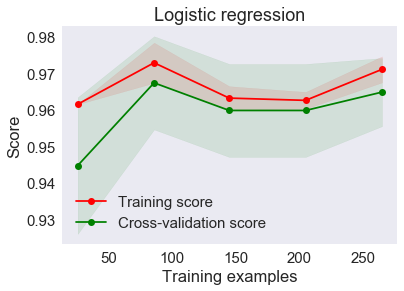

In [43]:
plot_learning_curve(final_model, 'Logistic regression', 
                    X_train_scaled, y_train, cv=cv);

**Conclusion:** such gap between training and validating curve indicates overfitting. But we can see that validation curve increasing with increasing amount of training examples, so more data is likely to help beat overfitting.

### 10.2 Validation curve

Plotting validation curve function:

In [44]:
def plot_validation_curve(estimator, title, X, y, param_name, param_range, 
                          cv=None, scoring=None, ylim=None, n_jobs=None):
    """
    Generates a simple plot of training and validation scores for different parameter values.
    
    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.
    
    param_name : string
        Name of the parameter that will be varied.

    param_range : array-like, shape (n_values,)
        The values of the parameter that will be evaluated.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.
    
    scoring : string, callable or None, optional, default: None
        A string (see model evaluation documentation) or
        a scorer callable object / function with signature
        ``scorer(estimator, X, y)``.
    
    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.
    
    """
    train_scores, test_scores = validation_curve(
    estimator, X, y, param_name, param_range,
    cv=cv, scoring=scoring, n_jobs=n_jobs)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure()
    plt.grid()
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel("Score")
    if ylim is not None:
        plt.ylim(*ylim)
    plt.semilogx(param_range, train_scores_mean, 'o-', label="Training score",
                 color="darkorange")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange")
    plt.semilogx(param_range, test_scores_mean, 'o-', label="Cross-validation score",
                 color="navy")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy")
    plt.legend(loc="best")
    return plt

Plot validation curve for model complexity parameter:

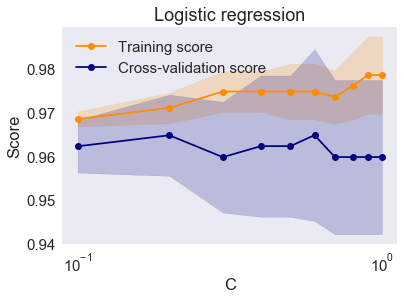

In [45]:
plot_validation_curve(final_model, 'Logistic regression', X_train_scaled, y_train,
                             'C', model_parameters['C'], 
                              cv=cv, scoring='accuracy');

**Conclusion:** gap between training and validating curve indicates overfitting. The best **C** parameter is 0.2

## 11. Prediction for test samples

Make predictions for test samples:

In [46]:
test_predictions = final_model.predict(X_test_scaled)

#### Accuracy score:

In [47]:
print('Accuracy test score:', accuracy_score(y_test, test_predictions))

Accuracy test score: 0.9824561403508771


**Conclusion:** result on the test samples are comparable to the results on cross-validation, even better. Thus our validation scheme is valid.

#### Confusion matrix:

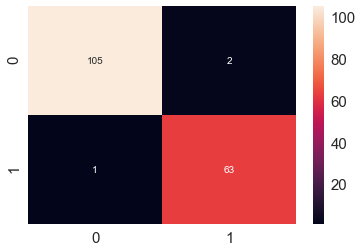

In [48]:
test_confusion_matrix = confusion_matrix(test_predictions, y_test);
sns.heatmap(test_confusion_matrix, annot=True, fmt='d');

From confusion matrix we can see that we have made a few wrong predicions.

#### Precision:

In [49]:
print('Precision:', precision_score(y_test, test_predictions))

Precision: 0.984375


#### Recall:

In [50]:
print('Recall:', recall_score(y_test, test_predictions))

Recall: 0.9692307692307692


## 12. Conclusions

Although we try simple model, it gives 98% accuracy, 98% precision and 97% recall on the test set. There are several (3-5) most important features for classification, which could indicates that our data is not representable or biased. So, it's a good option to try model on more data. Feature generation based on medicine knowledge for such data is quite challenging, so we build them based on math nature. 

#### Ways of improving:
- collect more data and re-train model on it, as we can see validation score improvement with data amount increasing on learning curve;
- dig into domain and generate more features based on medicine;
- try another models, like neural network (for capturing complex non-linear dependences) or random forest (robust to overfitting);
- apply PCA for data dimensionality reduction and train model on reduced data;
- try stacking differet models.